In [1]:
import sys

sys.path.append("../../")
import helper

import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# 성능 측정 지표 모듈
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

In [3]:
# 그래프 한글 설정
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [4]:
origin = read_excel("https://data.hossam.kr/E04/beans.xlsx")
origin.head()

,수분함유량,강도
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31


In [5]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   수분함유량   10 non-null     int64
 1   강도      10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [9]:
poly = PolynomialFeatures(include_bias=False)
fit = poly.fit_transform(origin[['수분함유량']])
fit

array([[  36., 1296.],
       [  40., 1600.],
       [  34., 1156.],
       [  44., 1936.],
       [  33., 1089.],
       [  36., 1296.],
       [  40., 1600.],
       [  33., 1089.],
       [  26.,  676.],
       [  36., 1296.]])

In [10]:
poly.get_feature_names_out()

array(['수분함유량', '수분함유량^2'], dtype=object)

In [11]:
x = DataFrame(fit, columns=poly.get_feature_names_out())
x.head()

,수분함유량,수분함유량^2
0,36.0,1296.0
1,40.0,1600.0
2,34.0,1156.0
3,44.0,1936.0
4,33.0,1089.0


In [12]:
y = origin[['강도']]
y.head()

,강도
0,29
1,32
2,29
3,40
4,31


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=42)
x_train.shape, y_train.shape

((7, 2), (7, 1))

In [14]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

계수:  [[-7.68421429  0.11174983]]
절편:  [161.96884839]
훈련 데이터 설명력:  0.9555214819362577
검증 데이터 설명력:  -5.696101923912336


In [15]:
y_train_pred = fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1)
y_train_pred

array([30.16491747, 30.08534491, 29.88836943, 30.16491747, 30.08534491,
       40.21109627, 33.40000954])

In [16]:
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([37.72216392, 33.40000954, 30.16491747])

In [19]:
x_train.columns

Index(['수분함유량', '수분함유량^2'], dtype='object')

In [20]:
x_test.columns

Index(['수분함유량', '수분함유량^2'], dtype='object')

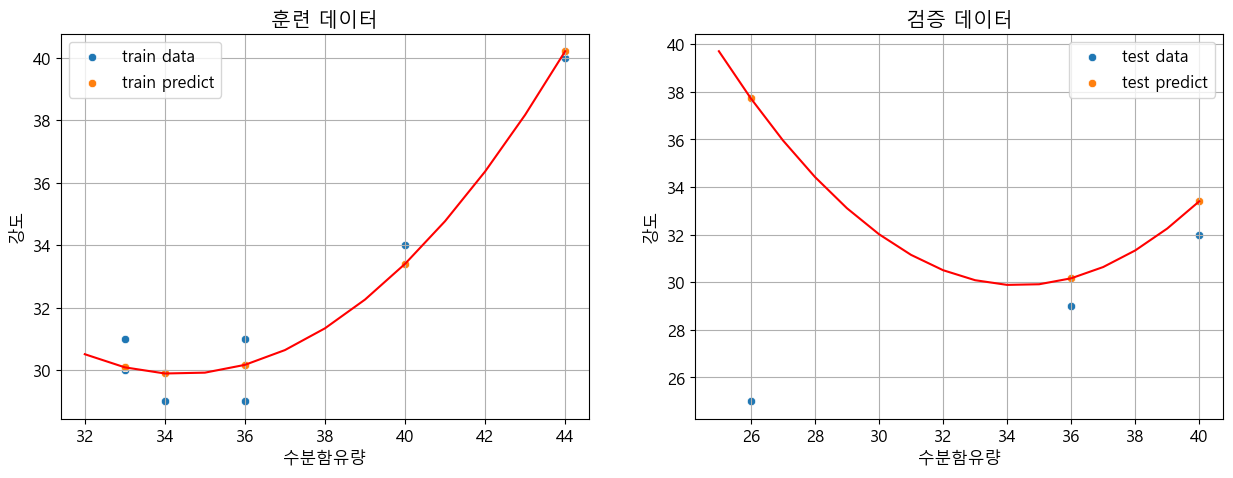

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 학습에 사용한 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_train['수분함유량'], y=y_train['강도'], label='train data', ax=ax1)
sb.scatterplot(x=x_train['수분함유량'], y=y_train_pred, label='train predict', ax=ax1)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax1.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)
# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()


# 검증용 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_test['수분함유량'], y=y_test['강도'], label='test data', ax=ax2)
sb.scatterplot(x=x_test['수분함유량'], y=y_test_pred, label='test predict', ax=ax2)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax2.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)

# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

In [22]:
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

훈련 데이터 설명력:  0.9555214819362577
검증 데이터 설명력:  -5.696101923912336


In [23]:
print("훈련데이터 설명력 :", r2_score(y_train, y_train_pred))
print("검증데이터 설명력 :",r2_score(y_test, y_test_pred))

훈련데이터 설명력 : 0.9555214819362577
검증데이터 설명력 : -5.696101923912336


In [24]:
print("훈련데이터 MAE :", mean_absolute_error(y_train, y_train_pred))
print("검증데이터 MAE :",mean_absolute_error(y_test, y_test_pred))

훈련데이터 MAE : 0.6713508798233505
검증데이터 MAE : 5.095696975479446


In [25]:
print("훈련데이터 MSE :", mean_squared_error(y_train, y_train_pred))
print("검증데이터 MSE :",mean_squared_error(y_test, y_test_pred))
# 제곱근을 구해서 RMAE값을 구하는 것이 일반적

훈련데이터 MSE : 0.5845748088377553
검증데이터 MSE : 55.056838041056984


In [26]:
print("훈련데이터 RMSE :", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("검증데이터 RMSE :", np.sqrt(mean_squared_error(y_test, y_test_pred)))

훈련데이터 RMSE : 0.764574920356243
검증데이터 RMSE : 7.420029517532729


In [27]:
# API로 제공되는 기능이 아니고, 직접 계산해야 하기 때문에 관측치와 예측치의 데이터 타입이 일치해야 한다.
# -> numpy 배열 혹은 Series 타입으로 통일해야 한다.
print("훈련 데이터 MAPE: ", np.mean(np.abs((y_train.values - y_train_pred) / y_train.values)) * 100)
print("검증 데이터 MAPE: ", np.mean(np.abs((y_test.values - y_test_pred) / y_test.values)) * 100)

훈련 데이터 MAPE:  10.523789771998016
검증 데이터 MAPE:  20.267291049558413


In [28]:
# API로 제공되는 기능이 아니고, 직접 계산해야 하기 때문에 관측치와 예측치의 데이터 타입이 일치해야 한다.
# -> numpy 배열 혹은 Series 타입으로 통일해야 한다.
print("훈련 데이터 MPE: ", np.mean((y_train.values - y_train_pred) / y_train.values) * 100)
print("검증 데이터 MPE: ", np.mean((y_test.values - y_test_pred) / y_test.values) * 100)

훈련 데이터 MPE:  -1.1322259715899774
검증 데이터 MPE:  -18.992928181299444


In [31]:
origin.columns

Index(['수분함유량', '강도'], dtype='object')

In [32]:
olsResult = helper.ml_ols(origin, xnames='수분함유량', yname='강도', degree=2, test_size=0.3, random_state=42)
print("계수:", olsResult.coef)
print("절편:", olsResult.intercept)

계수: [[-7.68421429  0.11174983]]
절편: [161.96884839]


In [33]:
print("R^2: ", olsResult.trainRegMetric.r2)
print("MAE: ", olsResult.trainRegMetric.mae)
print("MSE: ", olsResult.trainRegMetric.mse)
print("RMSE: ", olsResult.trainRegMetric.rmse)
print("MAPE: ", olsResult.trainRegMetric.mape)
print("MPE: ", olsResult.trainRegMetric.mpe)

R^2:  0.9555214819362577
MAE:  0.6713508798233505
MSE:  0.5845748088377553
RMSE:  0.764574920356243
MAPE:  2.1859308695700297
MPE:  -0.06907580526530054


In [34]:
print("R^2: ", olsResult.testRegMetric.r2)
print("MAE: ", olsResult.testRegMetric.mae)
print("MSE: ", olsResult.testRegMetric.mse)
print("RMSE: ", olsResult.testRegMetric.rmse)
print("MAPE: ", olsResult.testRegMetric.mape)
print("MPE: ", olsResult.testRegMetric.mpe)

R^2:  -5.696101923912336
MAE:  5.095696975479446
MSE:  55.056838041056984
RMSE:  7.420029517532729
MAPE:  19.760214090192786
MPE:  -19.760214090192786


In [35]:
origin = read_excel("https://data.hossam.kr/E04/aircon.xlsx")
origin.head()

,예약대수,판매대수
0,19,33
1,23,51
2,26,40
3,29,49
4,30,50


In [37]:
poly = PolynomialFeatures(include_bias=False)
fit = poly.fit_transform(origin[['예약대수']])
fit

array([[  19.,  361.],
       [  23.,  529.],
       [  26.,  676.],
       [  29.,  841.],
       [  30.,  900.],
       [  38., 1444.],
       [  39., 1521.],
       [  46., 2116.],
       [  49., 2401.],
       [  58., 3364.]])

In [38]:
x = DataFrame(fit, columns=poly.get_feature_names_out())
x.head()

,예약대수,예약대수^2
0,19.0,361.0
1,23.0,529.0
2,26.0,676.0
3,29.0,841.0
4,30.0,900.0


In [39]:
y = origin[['판매대수']]
y.head()

,판매대수
0,33
1,51
2,40
3,49
4,50


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=42)
x_train.shape, y_train.shape

((7, 2), (7, 1))

In [41]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

계수:  [[0.98368153 0.00780905]]
절편:  [12.0951396]
훈련 데이터 설명력:  0.9384027793119889
검증 데이터 설명력:  0.564467460903779


In [42]:
y_train_pred = fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1)
y_train_pred

array([33.60415519, 73.8684365 , 42.94977617, 95.41830728, 48.63372914,
       47.18931375, 62.33628198])

In [43]:
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([79.04505989, 38.85080145, 60.75130372])

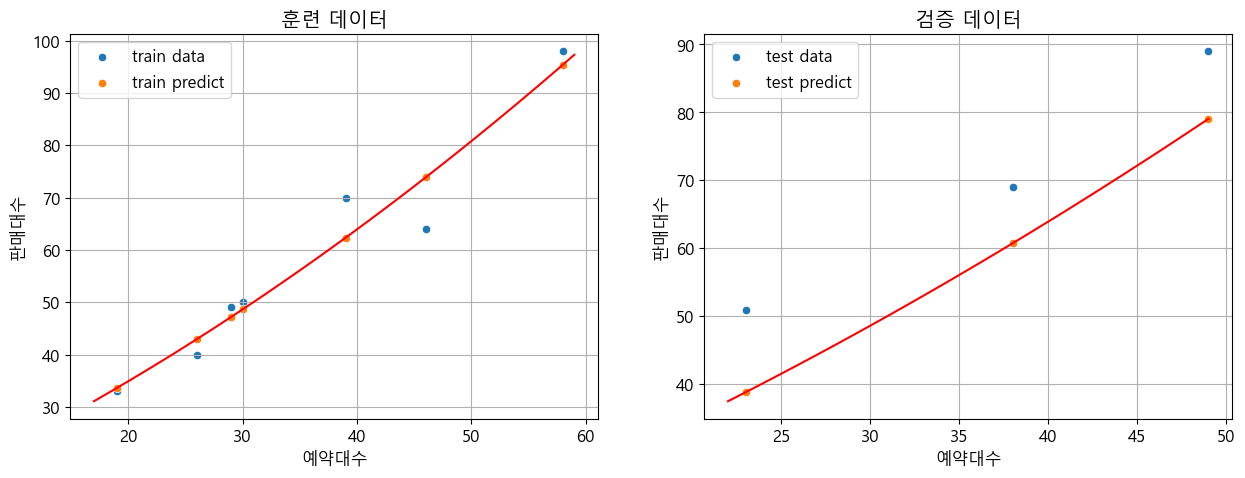

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 학습에 사용한 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_train['예약대수'], y=y_train['판매대수'], label='train data', ax=ax1)
sb.scatterplot(x=x_train['예약대수'], y=y_train_pred, label='train predict', ax=ax1)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax1.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)
# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()


# 검증용 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_test['예약대수'], y=y_test['판매대수'], label='test data', ax=ax2)
sb.scatterplot(x=x_test['예약대수'], y=y_test_pred, label='test predict', ax=ax2)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax2.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)

# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

In [45]:
olsResult = helper.ml_ols(origin, xnames='예약대수', yname='판매대수', degree=2, test_size=0.3, random_state=42)
print("계수:", olsResult.coef)
print("절편:", olsResult.intercept)

계수: [[0.98368153 0.00780905]]
절편: [12.0951396]


In [46]:
print("R^2: ", olsResult.trainRegMetric.r2)
print("MAE: ", olsResult.trainRegMetric.mae)
print("MSE: ", olsResult.trainRegMetric.mse)
print("RMSE: ", olsResult.trainRegMetric.rmse)
print("MAPE: ", olsResult.trainRegMetric.mape)
print("MPE: ", olsResult.trainRegMetric.mpe)

R^2:  0.9384027793119889
MAE:  3.8349622453885934
MSE:  25.2850305493603
RMSE:  5.028422272379309
MAPE:  6.376430640300557
MPE:  -0.6591824339459996


In [47]:
print("R^2: ", olsResult.testRegMetric.r2)
print("MAE: ", olsResult.testRegMetric.mae)
print("MSE: ", olsResult.testRegMetric.mse)
print("RMSE: ", olsResult.testRegMetric.rmse)
print("MAPE: ", olsResult.testRegMetric.mape)
print("MPE: ", olsResult.testRegMetric.mpe)

R^2:  0.564467460903779
MAE:  10.117611645831923
MSE:  104.91494941784525
RMSE:  10.242799881763055
MAPE:  15.653972063430166
MPE:  15.653972063430166


In [48]:
origin = read_excel("https://data.hossam.kr/E04/galton.xlsx")
origin.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [49]:
poly = PolynomialFeatures(include_bias=False)
fit = poly.fit_transform(origin[['parent']])
fit

array([[  70.5 , 4970.25],
       [  68.5 , 4692.25],
       [  65.5 , 4290.25],
       ...,
       [  69.5 , 4830.25],
       [  69.5 , 4830.25],
       [  69.5 , 4830.25]])

In [50]:
x = DataFrame(fit, columns=poly.get_feature_names_out())
x.head()

,parent,parent^2
0,70.5,4970.25
1,68.5,4692.25
2,65.5,4290.25
3,64.5,4160.25
4,64.0,4096.00


In [51]:
y = origin[['child']]
y.head()

,child
0,61.7
1,61.7
2,61.7
3,61.7
4,61.7


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=42)
x_train.shape, y_train.shape

((649, 2), (649, 1))

In [53]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

계수:  [[-3.61897493  0.03089946]]
절편:  [171.03320096]
훈련 데이터 설명력:  0.19478714847831846
검증 데이터 설명력:  0.25688609049825617


In [54]:
y_train_pred = fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1)
y_train_pred

array([68.12140915, 68.12140915, 67.53805753, 67.53805753, 68.12140915,
       68.7665597 , 68.7665597 , 71.07280484, 68.12140915, 68.12140915,
       68.12140915, 67.53805753, 68.7665597 , 67.53805753, 68.12140915,
       66.55675104, 70.24225754, 68.12140915, 67.53805753, 68.12140915,
       68.12140915, 68.7665597 , 67.53805753, 68.7665597 , 67.53805753,
       66.55675104, 67.53805753, 68.7665597 , 67.01650483, 68.7665597 ,
       68.12140915, 69.47350916, 68.12140915, 68.7665597 , 69.47350916,
       67.01650483, 68.12140915, 67.53805753, 68.12140915, 67.53805753,
       67.53805753, 68.7665597 , 67.53805753, 67.53805753, 66.55675104,
       67.01650483, 67.53805753, 71.07280484, 68.12140915, 67.53805753,
       67.53805753, 67.53805753, 68.12140915, 66.15879618, 68.7665597 ,
       68.7665597 , 66.55675104, 68.7665597 , 68.7665597 , 69.47350916,
       66.55675104, 67.53805753, 67.01650483, 68.12140915, 68.12140915,
       67.53805753, 68.7665597 , 68.7665597 , 67.53805753, 68.12

In [55]:
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([68.12140915, 67.53805753, 66.55675104, 66.55675104, 68.12140915,
       67.53805753, 68.7665597 , 67.53805753, 67.53805753, 68.12140915,
       67.01650483, 67.53805753, 66.55675104, 68.12140915, 68.7665597 ,
       67.01650483, 66.15879618, 68.7665597 , 70.24225754, 68.12140915,
       69.47350916, 68.12140915, 66.15879618, 68.7665597 , 68.7665597 ,
       69.47350916, 68.12140915, 68.12140915, 68.7665597 , 68.12140915,
       67.53805753, 67.53805753, 68.12140915, 68.7665597 , 67.53805753,
       67.53805753, 67.53805753, 69.47350916, 67.01650483, 68.12140915,
       66.55675104, 68.7665597 , 68.7665597 , 68.12140915, 68.7665597 ,
       68.12140915, 67.53805753, 68.7665597 , 68.7665597 , 67.53805753,
       67.53805753, 67.53805753, 68.12140915, 69.47350916, 68.12140915,
       66.55675104, 67.53805753, 68.12140915, 68.7665597 , 67.53805753,
       68.12140915, 67.53805753, 67.01650483, 68.7665597 , 68.7665597 ,
       68.12140915, 68.7665597 , 67.53805753, 67.01650483, 67.53

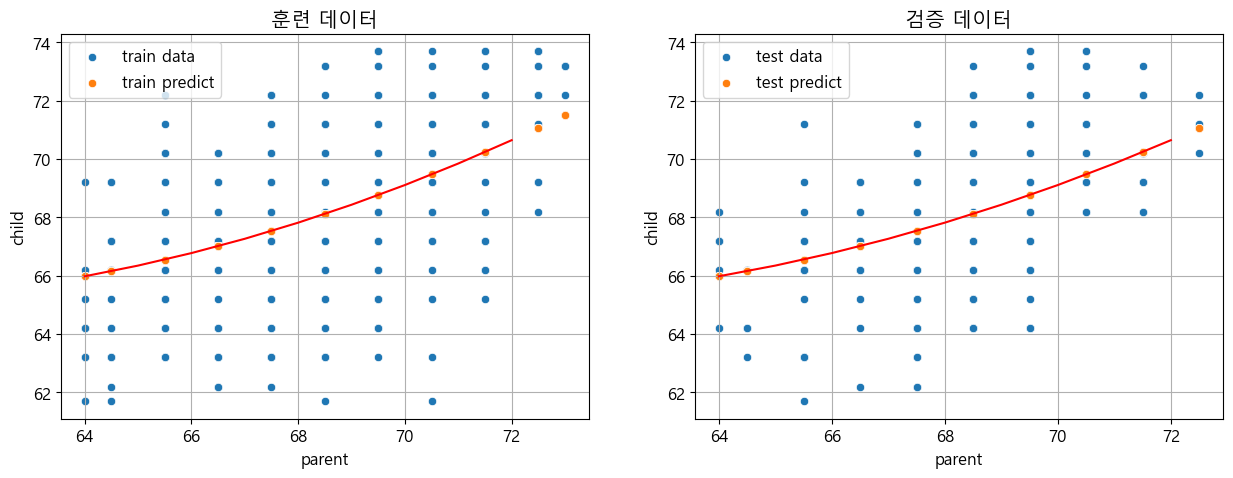

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 학습에 사용한 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_train['parent'], y=y_train['child'], label='train data', ax=ax1)
sb.scatterplot(x=x_train['parent'], y=y_train_pred, label='train predict', ax=ax1)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax1.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)
# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()


# 검증용 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_test['parent'], y=y_test['child'], label='test data', ax=ax2)
sb.scatterplot(x=x_test['parent'], y=y_test_pred, label='test predict', ax=ax2)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax2.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)

# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

In [58]:
olsResult = helper.ml_ols(origin, xnames='parent', yname='child', degree=2, test_size=0.3, random_state=42)
print("계수:", olsResult.coef)
print("절편:", olsResult.intercept)

계수: [[-3.61897493  0.03089946]]
절편: [171.03320096]


In [59]:
print("R^2: ", olsResult.trainRegMetric.r2)
print("MAE: ", olsResult.trainRegMetric.mae)
print("MSE: ", olsResult.trainRegMetric.mse)
print("RMSE: ", olsResult.trainRegMetric.rmse)
print("MAPE: ", olsResult.trainRegMetric.mape)
print("MPE: ", olsResult.trainRegMetric.mpe)

R^2:  0.19478714847831846
MAE:  1.828820729254754
MSE:  5.123306585268976
RMSE:  2.2634722408876535
MAPE:  2.701528568334578
MPE:  -0.11179067132274788


In [60]:
print("R^2: ", olsResult.testRegMetric.r2)
print("MAE: ", olsResult.testRegMetric.mae)
print("MSE: ", olsResult.testRegMetric.mse)
print("RMSE: ", olsResult.testRegMetric.rmse)
print("MAPE: ", olsResult.testRegMetric.mape)
print("MPE: ", olsResult.testRegMetric.mpe)

R^2:  0.25688609049825617
MAE:  1.7166386224852623
MSE:  4.655070551078052
RMSE:  2.157561250828827
MAPE:  2.534084027286575
MPE:  -0.18039781324673226
